# Bike Sharing - Assignment

From the given data set, understand what factors are affecting the demand for shared bikes.

**Problem Statement**

Identify which variables are significant in predicting demand for the shared bikes





### Part 1 - To start with, import all the needed packages in the start of execution only. 

In [861]:
#import the libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

### Part 2 - Set few of the options needed for getting a better display on the output

Using pandas do load the given CSV file which is size ~57 KB.
 

In [862]:
# Set few options for Dataframe which will be helpfull in viewing the output
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 100)
pd.set_option('expand_frame_repr', True)
#Check the datatypes of all the columns of the dataframe
bikesharing = pd.read_csv('day.csv')
bikesharing.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [863]:
#Get the total number of rows and columns  present
bikesharing.shape

(730, 16)

In [864]:
#Get the view of the data set by printing first 5 rows
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [865]:
#Do check for the columns having values as null. Based on that we might need to handle data cleaning up activity
bikesharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Findings ::

Current data set have 7030 rows and 16 columns.

From the above output we can see there are no columns have null values.

In [866]:
#Do check for the presence of unique values present in the given data set
bikesharing.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

As per the Data set dictionary, columns 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday' and 'weathersit' are having representation values only.

### Part 3 - Dataset cleaning process

In [867]:
#From the above data we can see 'instant' column is more about record index (Same from data dictionary we can understand)
#and also 'dteday' column is having date value. These are having all unique values which will not get much info for a model.
#From the problem statement its clear that casual and registered are not significant as there sum is equal to value present 'cnt' column.
bikesharing = bikesharing.drop(['instant','dteday','casual','registered'], axis=1)

Map all values of categorical variables to human readable form

In [868]:
#season : season (1:spring, 2:summer, 3:fall, 4:winter)
bikesharing[['season']] = bikesharing[['season']].apply(lambda x: x.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'}))

#yr : year (0: 2018, 1:2019)
bikesharing[['yr']] = bikesharing[['yr']].apply(lambda x: x.map({0:'2018',1:'2019'}))

#mnth : month ( 1 to 12)
bikesharing[['mnth']] = bikesharing[['mnth']].apply(lambda x: x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',
                                                                     5:'May',6:'Jun',7:'Jul',8:'Aug',
                                                                     9:'Sep',10:'Oct',11:'Nov',12:'Dec'}))

#holiday : weather day is a holiday or not
bikesharing[['holiday']] = bikesharing[['holiday']].apply(lambda x: x.map({0:'No',1:'Yes'}))

#weekday : day of the week , from live class it was guided to start with 0: as tuesday 
bikesharing[['weekday']] = bikesharing[['weekday']].apply(lambda x: x.map({0:'Tue',1:'Wed',2:'Thur',
                                                                           3:'Fri',4:'Sat',5:'Sun',6:'Mon'}))
#workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
bikesharing[['workingday']] = bikesharing[['workingday']].apply(lambda x: x.map({0:'No',1:'Yes'}))

#weathersit : 
#		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bikesharing[['weathersit']] = bikesharing[['weathersit']].apply(lambda x: x.map({1:'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Heavy Rain'}))


### Part 4 - EDA

First identify categorical columns (Here 'cnt' is the target variable) 

In [869]:
categorical_columns = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
categorical_xlabel = ['Season','Year','Month','Holiday','WeekDay','Working Day','Weather Type']

Univariate Analysis for categorical columns

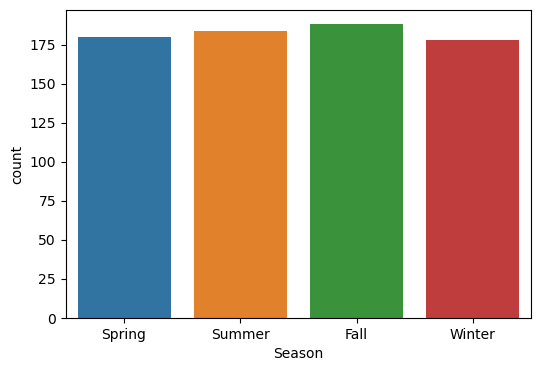

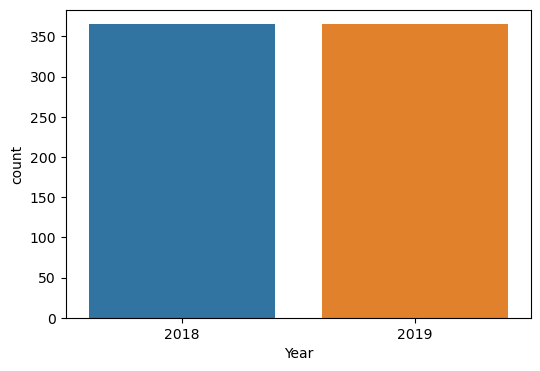

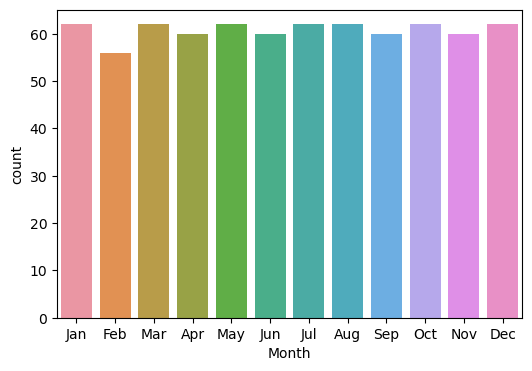

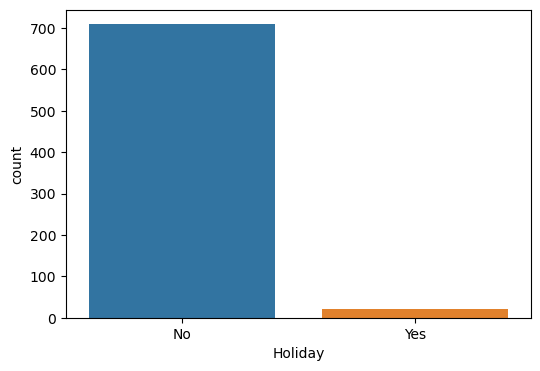

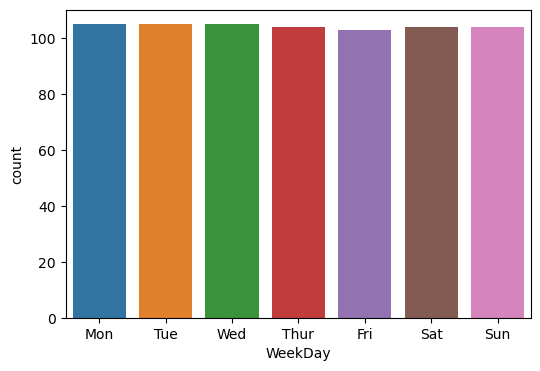

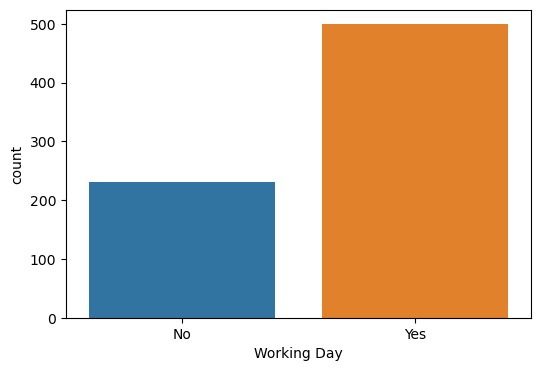

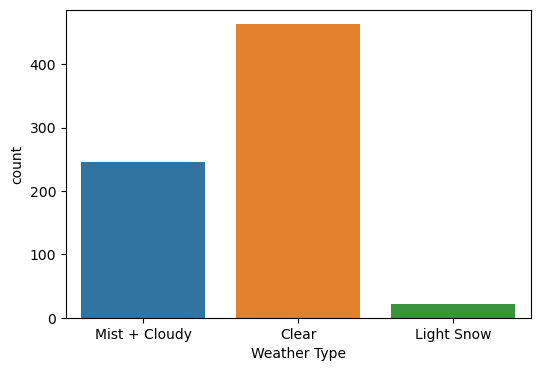

In [870]:

for i in range(len(categorical_columns)):
    plt.figure(figsize=[6,4])
    pltAxes = sns.countplot(data = bikesharing, x = categorical_columns[i])
    pltAxes.set_xlabel(categorical_xlabel[i])
    plt.show()

##### Here are the observations from above univariate analysis of categorical data #####
1. We have more number of days whether weather was clear
2. When compared with working days data, majority of them are for working days
3. Data with Holidays is less

Bivariate analysis for categorical columns

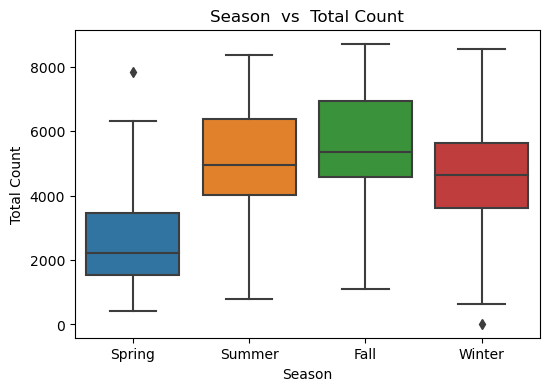

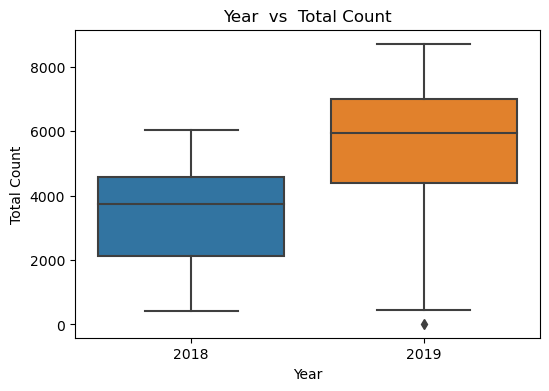

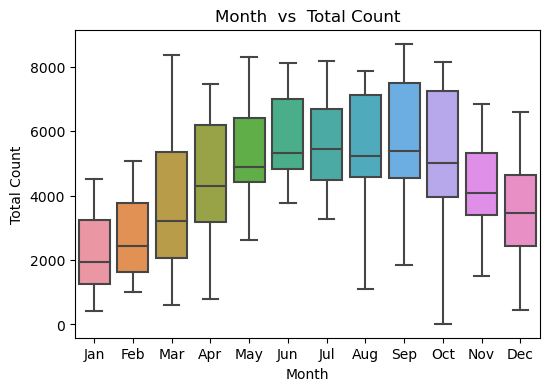

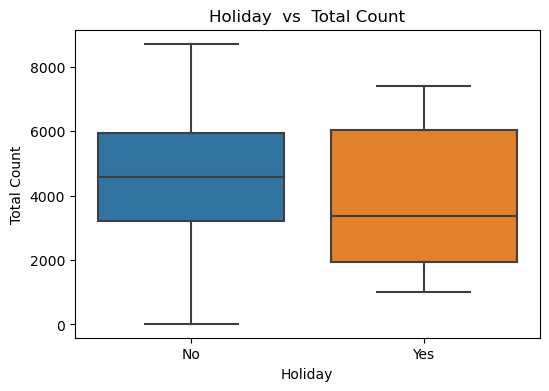

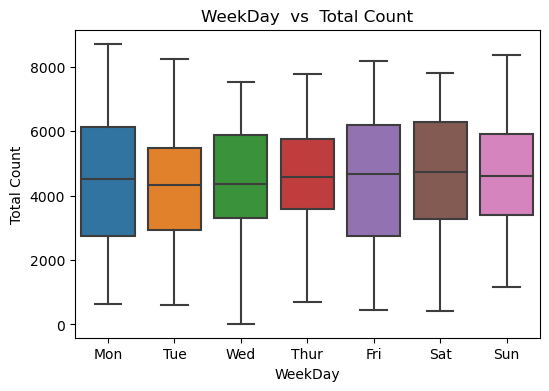

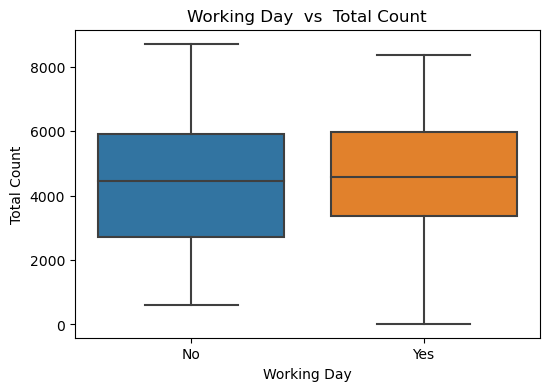

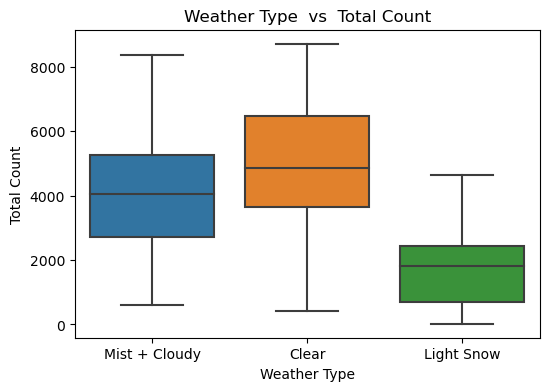

In [871]:
for i in range(len(categorical_columns)):
    plt.figure(figsize=[6,4])
    pltAxes = sns.boxplot(bikesharing,x=categorical_columns[i],y='cnt')
    pltAxes.set_xlabel(categorical_xlabel[i])
    pltAxes.set_ylabel('Total Count')
    pltAxes.set_title( categorical_xlabel[i] + '  vs  Total Count')
    plt.show()

##### Here are the observations from above Bivariate analysis for categorical columns #####
1. In Summer and Fall seasons good amount of rentals are there when compared with other two seasons
2. In Y2019 there are more number of rentals
3. During April to October months there are more number of rentals
4. When weather is Clear, there are more number of rentals

Identify the numerical columns in the given data frame

In [872]:
numerical_coluns = ['temp', 'atemp', 'hum', 'windspeed','cnt']

Univariate analysis for numerical columns

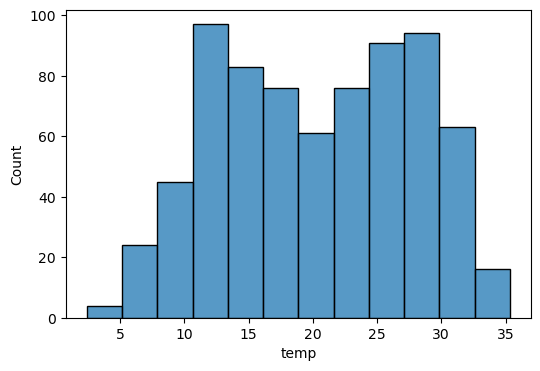

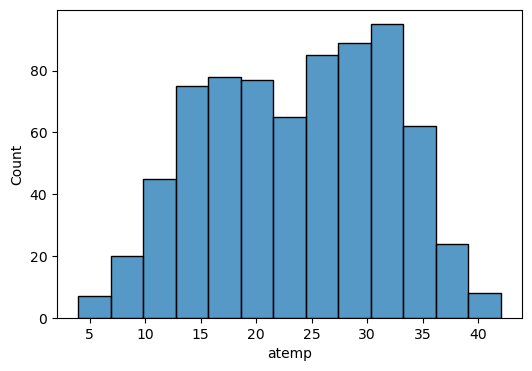

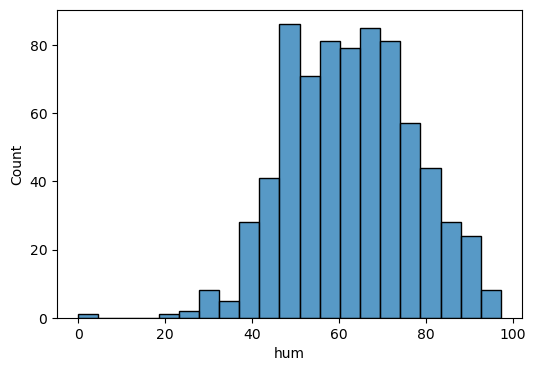

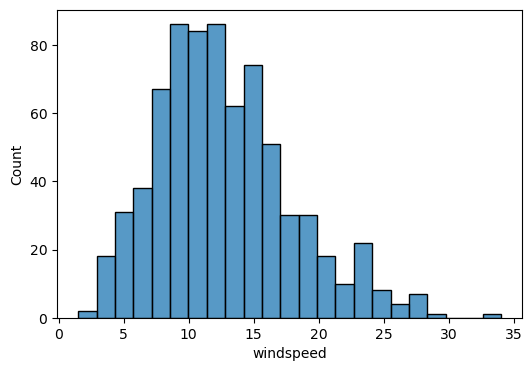

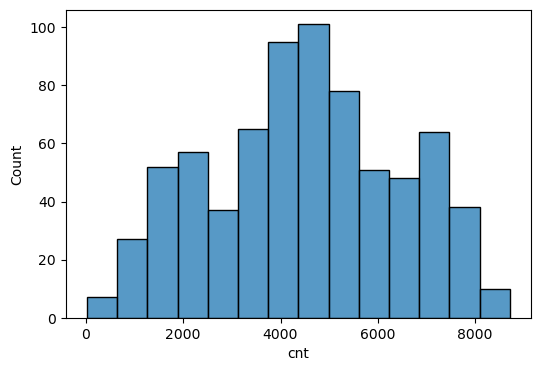

In [873]:
for colName in numerical_coluns:
    plt.figure(figsize=[6,4])
    sns.histplot(bikesharing[colName])
    plt.show()

##### Here are the observations from above Univariate analysis for numerical columns #####
1. On Windspeed, good amount of data distributed between greater than 5 and less than 20
2. On humidity, good amount of data distributed between greater than 40 and less than 90
3. On temp and atemp data, around 10 to 30 its distributed.

Bivariate analysis for numerical columns

<Figure size 600x400 with 0 Axes>

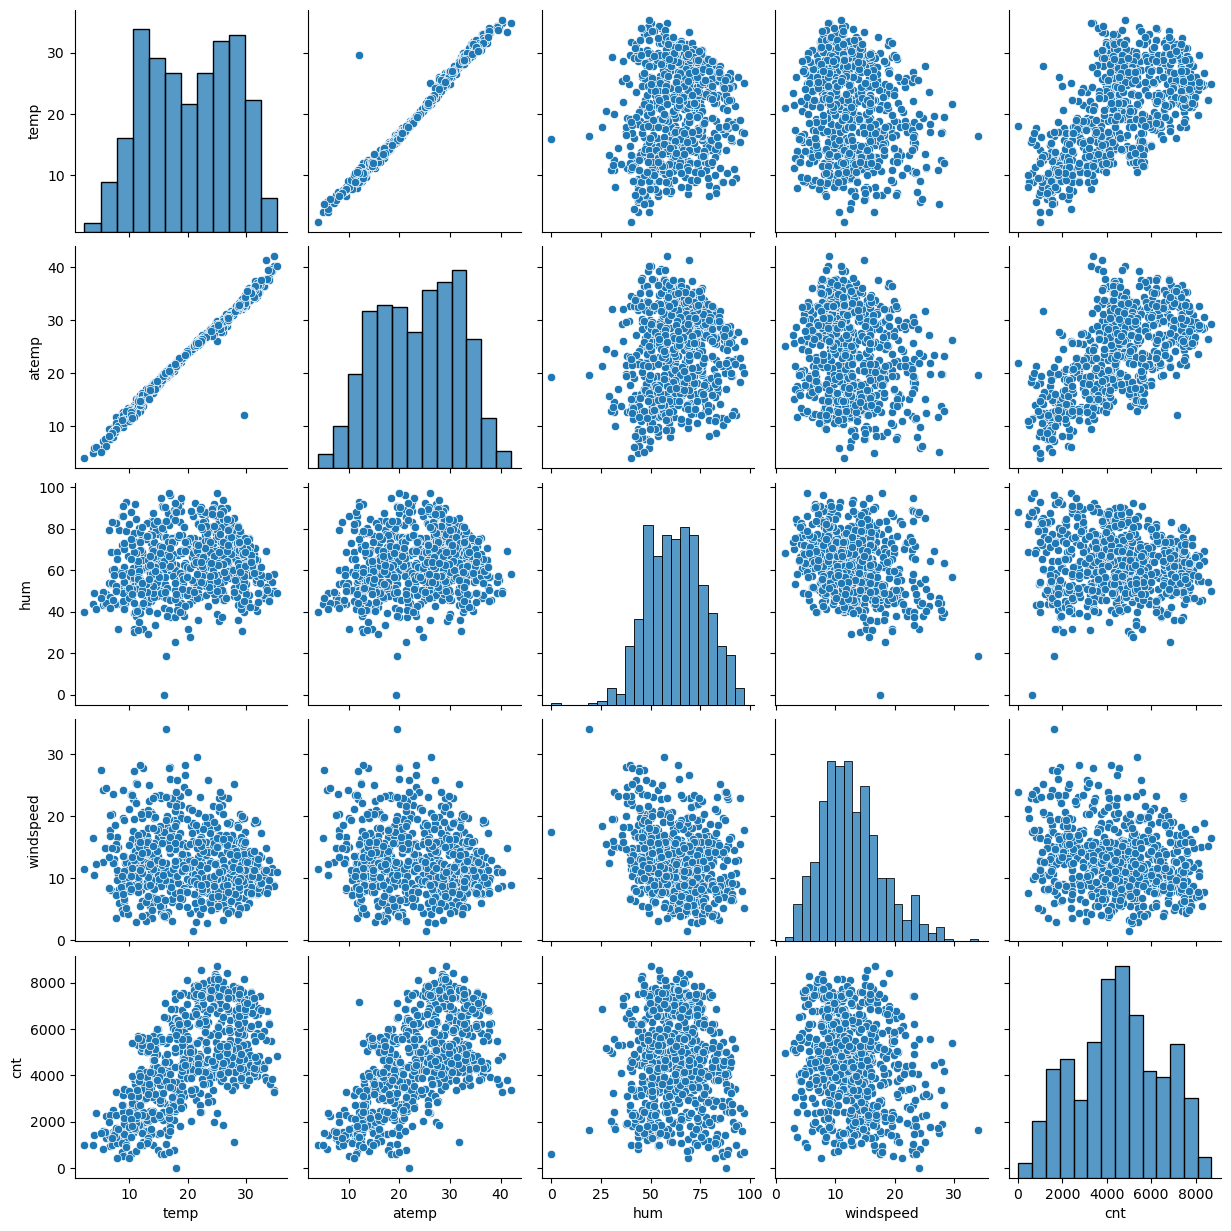

In [874]:
plt.figure(figsize=[6,4])
sns.pairplot(data=bikesharing, vars= numerical_coluns)
plt.show()

Heatmap for checking correlation between numerical columns

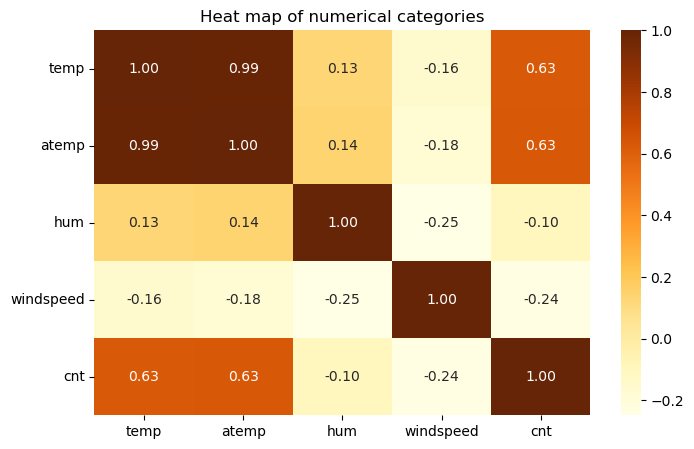

In [875]:
plt.figure(figsize=(8,5))
pltAxes = sns.heatmap(bikesharing[numerical_coluns].corr(method ='pearson'), annot=True, fmt=".2f", cmap="YlOrBr")
pltAxes.set_title('Heat map of numerical categories')
pltAxes.set_xticklabels(numerical_coluns)
pltAxes.set_yticklabels(numerical_coluns, rotation=0)
plt.show()

##### Here are the observations from above heat map #####
1. On positive correlation we have with temp and atemp
2. On negative correlation we have with humidity and weather

In [876]:
#As correlation between temp and atemp is same, and also as per definition of data dictionary atemp is the value referring to feeling temperature in Celsius
#so dropping this column. 
bikesharing = bikesharing.drop(['atemp'], axis=1)

### Part 5 - Adding Dummy variables

In [877]:
bikesharing = pd.get_dummies(data=bikesharing, columns=categorical_columns, drop_first=True)

In [878]:
bikesharing.head()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_Light Snow,weathersit_Mist + Cloudy
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [879]:
bikesharing.shape

(730, 29)

In [880]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   temp                      730 non-null    float64
 1   hum                       730 non-null    float64
 2   windspeed                 730 non-null    float64
 3   cnt                       730 non-null    int64  
 4   season_Spring             730 non-null    uint8  
 5   season_Summer             730 non-null    uint8  
 6   season_Winter             730 non-null    uint8  
 7   yr_2019                   730 non-null    uint8  
 8   mnth_Aug                  730 non-null    uint8  
 9   mnth_Dec                  730 non-null    uint8  
 10  mnth_Feb                  730 non-null    uint8  
 11  mnth_Jan                  730 non-null    uint8  
 12  mnth_Jul                  730 non-null    uint8  
 13  mnth_Jun                  730 non-null    uint8  
 14  mnth_Mar  

## Part 6: Splitting the Data into Training and Testing Sets,rescaling, checking correlation

In [881]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikesharing, train_size = 0.7, test_size = 0.3, random_state = 100)

Apply minmax scaling method for the identified columnsin bikesharing dataset

In [882]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
numerical_forscaling = ['temp', 'windspeed', 'cnt']

df_train[numerical_forscaling] = scaler.fit_transform(df_train[numerical_forscaling])

In [883]:
df_train.head()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_Light Snow,weathersit_Mist + Cloudy
653,0.509887,55.8333,0.300794,0.864243,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
576,0.815169,70.4167,0.264686,0.827658,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
426,0.442393,62.1250,0.255342,0.465255,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
728,0.245101,48.3333,0.663106,0.204096,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
482,0.395666,48.9583,0.188475,0.482973,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [884]:
df_train.describe()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,workingday_Yes,weathersit_Light Snow,weathersit_Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,63.112926,0.320768,0.513620,0.243137,0.245098,0.24902,0.507843,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.025490,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.676471,0.029412,0.343137
std,0.225844,14.156632,0.169797,0.224593,0.429398,0.430568,0.43287,0.500429,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.157763,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.468282,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,52.270825,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,63.437500,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.735215,73.250025,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,97.041700,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


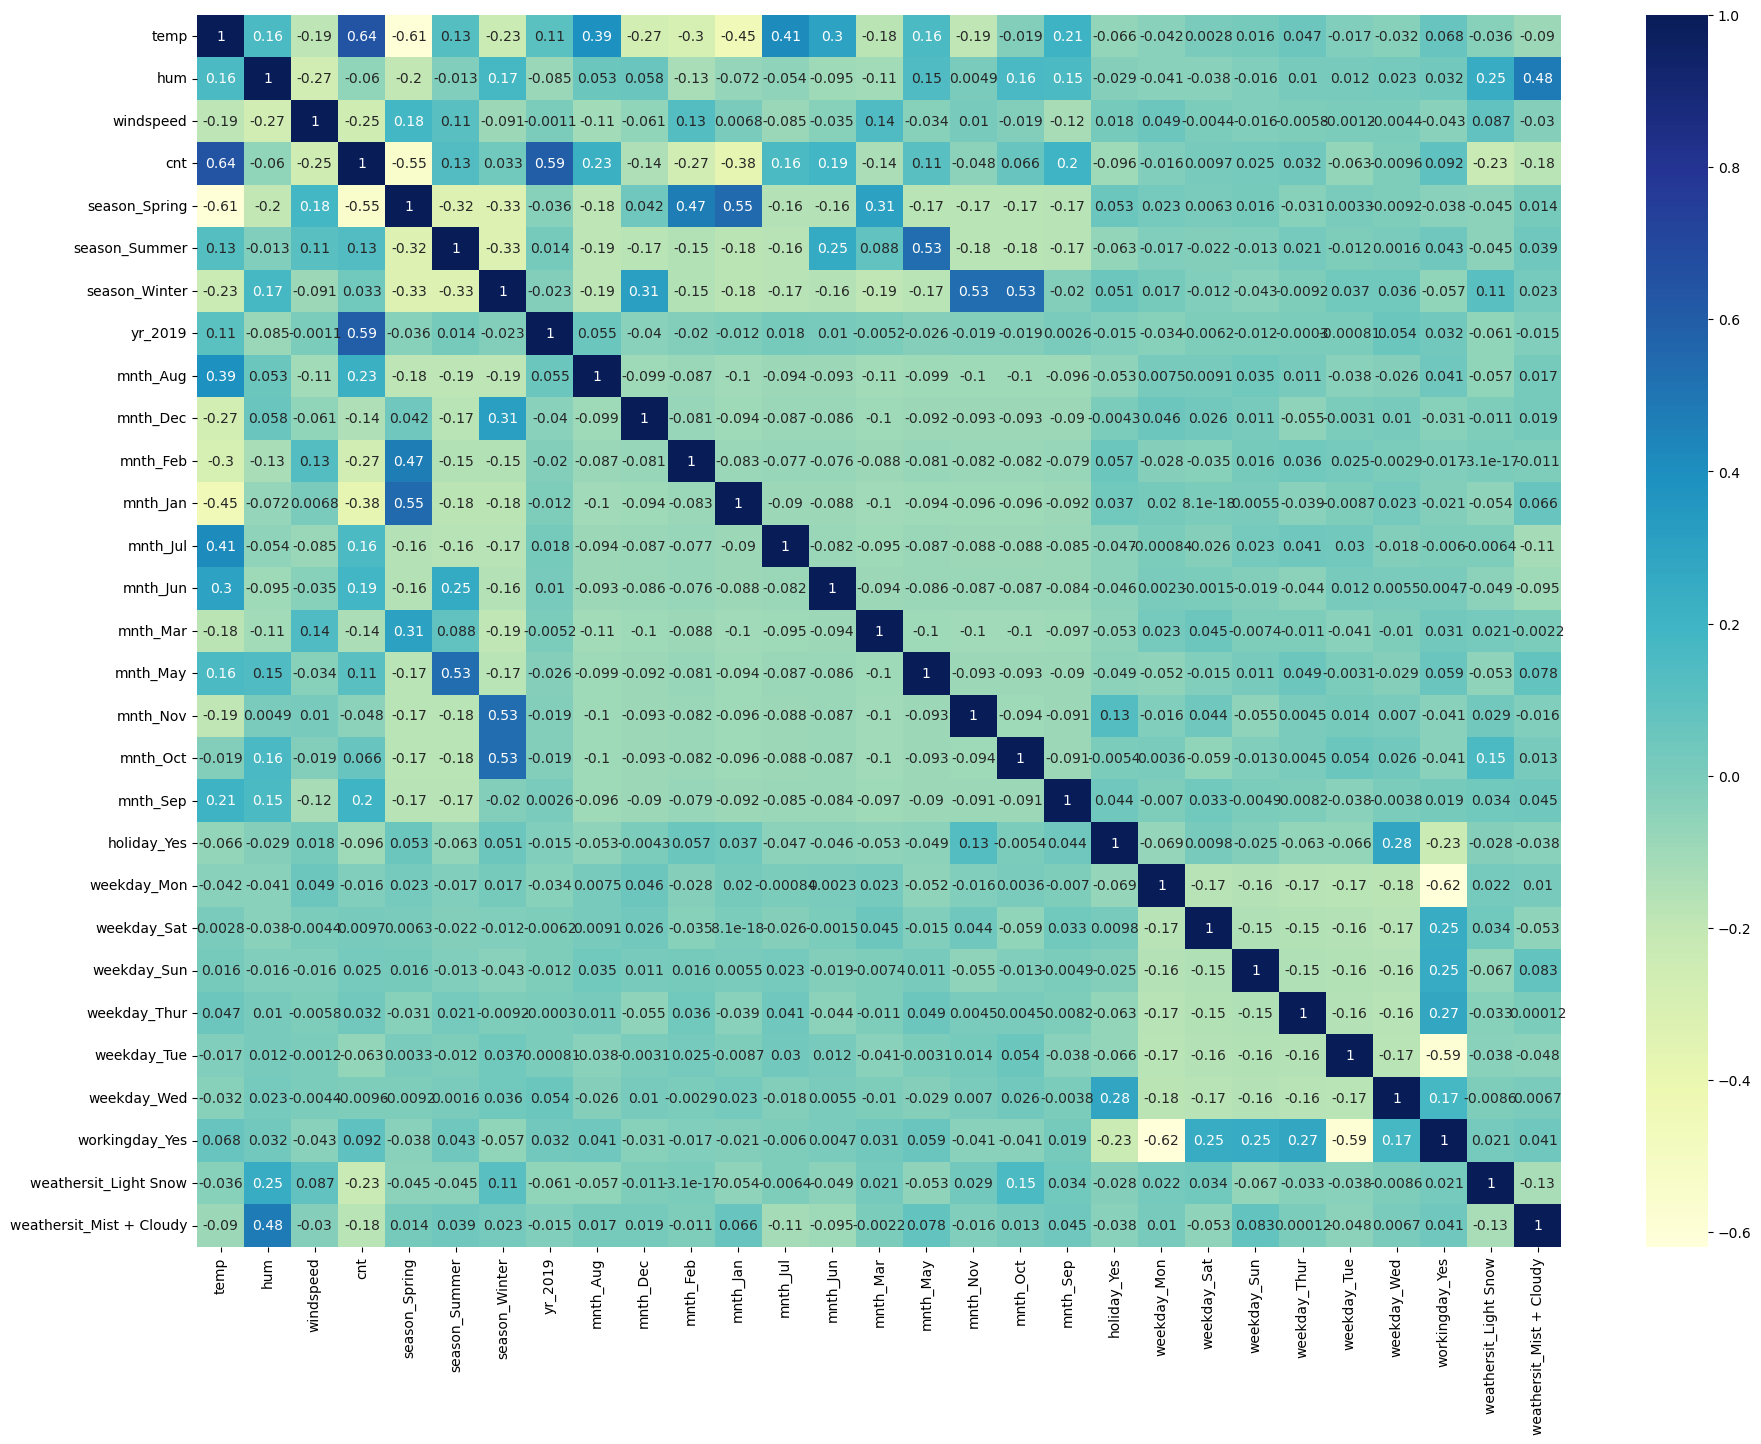

In [885]:
#Checking correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (22, 16))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

temp or atemp seems tobe highly correlated with cnt variable

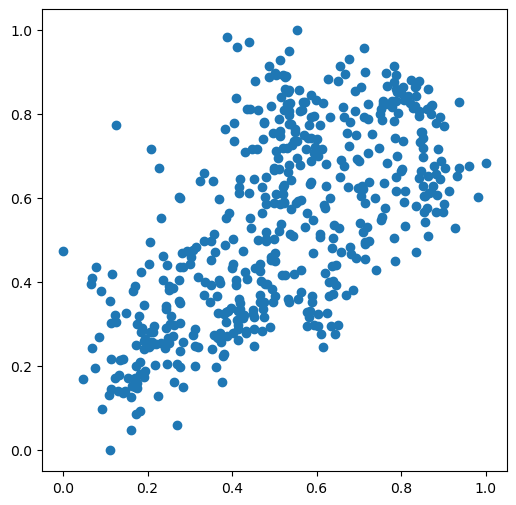

In [886]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.cnt, df_train.temp)
plt.show()

##### Dividing into X and Y sets for the model building #####

In [887]:
y_train = df_train.pop('cnt')
X_train = df_train

## Part 7: Model Building - Using RFE method

In [888]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [889]:
# Running RFE
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [890]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', False, 13),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 3),
 ('season_Winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 10),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 4),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 12),
 ('weekday_Sun', False, 9),
 ('weekday_Thur', False, 7),
 ('weekday_Tue', False, 5),
 ('weekday_Wed', False, 6),
 ('workingday_Yes', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [891]:
col = X_train.columns[rfe.support_]
print(col)

Index(['temp', 'windspeed', 'season_Spring', 'season_Winter', 'yr_2019',
       'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'holiday_Yes', 'weekday_Mon', 'workingday_Yes', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')


In [892]:
#Listing columns which are not playing a significant role (As per RFE process)
X_train.columns[~rfe.support_]

Index(['hum', 'season_Summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [893]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

Model#1

In [894]:
# Running the linear model
lm1 = sm.OLS(y_train,X_train_rfe).fit() 
#Let's see the summary of our linear model  
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.0
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          1.30e-188
Time:                        14:20:45   Log-Likelihood:                 513.31
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [895]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [896]:
# Calculate the VIFs for the Model#1
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,7.06
12,workingday_Yes,5.10
1,windspeed,4.19
3,season_Winter,2.57
2,season_Spring,2.50
4,yr_2019,2.07
11,weekday_Mon,1.95
8,mnth_Nov,1.81
6,mnth_Jan,1.67
14,weathersit_Mist + Cloudy,1.55


1. `holiday_Yes ` is insignificant as it is having higher p value
2. 'temp' and 'workingday_Yes' is having VIF value > 5 

In [897]:
#Droping 'holiday_Yes' column
X_train_formodel2 = X_train_rfe.drop(["holiday_Yes"], axis = 1)

In [898]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm2 = sm.add_constant(X_train_formodel2)
# Running the linear model
lm2 = sm.OLS(y_train,X_train_lm2).fit() 
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.7
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          4.64e-189
Time:                        14:20:45   Log-Likelihood:                 511.64
No. Observations:                 510   AIC:                            -993.3
Df Residuals:                     495   BIC:                            -929.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [899]:
# Calculate the VIFs for the Model#1
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_formodel2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.72
11,workingday_Yes,4.56
1,windspeed,4.17
3,season_Winter,2.56
2,season_Spring,2.45
4,yr_2019,2.07
10,weekday_Mon,1.82
8,mnth_Nov,1.77
6,mnth_Jan,1.67
13,weathersit_Mist + Cloudy,1.55


In [900]:
#Droping 'holiday_Yes' column
X_train_formodel3 = X_train_rfe.drop(["workingday_Yes"], axis = 1)

In [901]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm3 = sm.add_constant(X_train_formodel3)
# Running the linear model
lm3 = sm.OLS(y_train,X_train_lm3).fit() 
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.9
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          3.00e-186
Time:                        14:20:45   Log-Likelihood:                 504.94
No. Observations:                 510   AIC:                            -979.9
Df Residuals:                     495   BIC:                            -916.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [902]:
# Calculate the VIFs for the Model#1
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_formodel3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.70
1,windspeed,4.08
3,season_Winter,2.54
2,season_Spring,2.37
4,yr_2019,2.07
8,mnth_Nov,1.80
6,mnth_Jan,1.65
13,weathersit_Mist + Cloudy,1.53
5,mnth_Dec,1.46
7,mnth_Jul,1.36


In [903]:
#Droping 'holiday_Yes' column
X_train_formodel4 = X_train_formodel3.drop(["weekday_Mon"], axis = 1)

In [904]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm4 = sm.add_constant(X_train_formodel4)
# Running the linear model
lm4 = sm.OLS(y_train,X_train_lm4).fit() 
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          1.08e-186
Time:                        14:20:45   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [905]:
# Calculate the VIFs for the Model#1
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_formodel4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.67
1,windspeed,4.05
3,season_Winter,2.54
2,season_Spring,2.36
4,yr_2019,2.06
8,mnth_Nov,1.80
6,mnth_Jan,1.65
12,weathersit_Mist + Cloudy,1.53
5,mnth_Dec,1.46
7,mnth_Jul,1.36


In [906]:
y_train_cnt = lm4.predict(X_train_lm4)

In [907]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

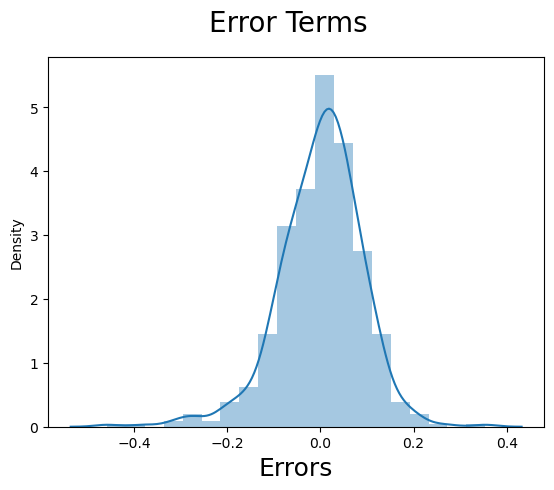

In [908]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  
plt.xlabel('Errors', fontsize = 18)  

In [909]:
df_test[numerical_forscaling] = scaler.transform(df_test[numerical_forscaling])

In [910]:
y_test = df_test.pop('cnt')
X_test = df_test

In [911]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_formodel4.columns]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [912]:
# Making predictions
y_pred = lm4.predict(X_test_new)

Text(0, 0.5, 'y_pred')

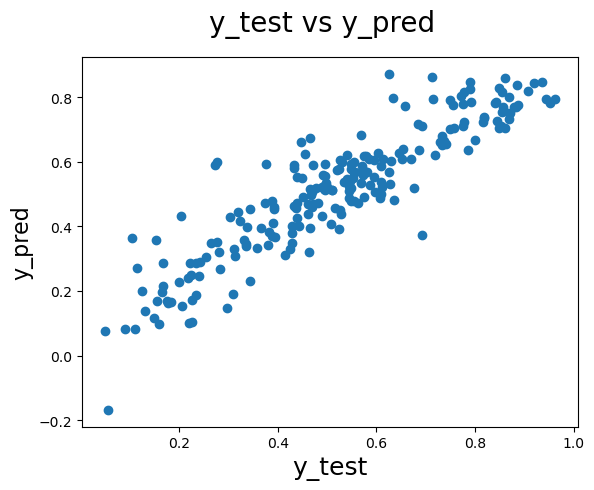

In [913]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [914]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8161282341346277